In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import total_count, column_description, separate_items


Let's read the data of the stackoverflow from the previous two years

In [2]:
file_name = 'Data/survey_results_public_2018.csv'
df_18 = pd.read_csv(file_name)

file_name = 'Data/survey_results_public_2019.csv'
df_19 = pd.read_csv(file_name)

schema = pd.read_csv('Data/survey_results_schema.csv')


In [3]:
df_19.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


We are interested in the languages the developers are working with. So let's look at the exact question we are interested in

In [4]:
column_description('LanguageDesireNextYear', schema)

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [5]:
df_18['LanguageDesireNextYear'].value_counts().reset_index()

,index,LanguageDesireNextYear
0,Python,908
1,Java,608
2,C#;JavaScript;SQL;TypeScript;HTML;CSS,605
3,C#,594
4,JavaScript;HTML;CSS,550
...,...,...
28652,C#;F#;Python;Swift;TypeScript;Ocaml;HTML;CSS;B...,1
28653,Clojure;Go;JavaScript;Python;Rust;TypeScript,1
28654,Clojure;Go;JavaScript;Ruby;HTML;CSS,1
28655,Erlang;Go;JavaScript;Python;R;Ruby;Rust;Scala;...,1


Many developers work with more than one languages. Let's separate the languages to get a list of unique individual languages. `separate_items` is a function in utils.py that we would use for this. 

In [6]:
languages_list_19 = list(df_19.groupby(['LanguageWorkedWith']).mean().index)
languages_19 = separate_items(languages_list_19)

languages_list_18 = list(df_18.groupby(['LanguageWorkedWith']).mean().index)
languages_18 = separate_items(languages_list_18)

languages_desire_18 = list(df_18.groupby(['LanguageDesireNextYear']).mean().index)
languages_desire = separate_items(languages_list_18)

In [7]:
languages_19[:5]

['Other(s):', 'Dart', 'Elixir', 'Assembly', 'F#']

Let's build a new dataframe that contains the individual languages and their count. The function `total_count` let's us do that

In [8]:
languages_df19 = total_count(df_19, 'LanguageWorkedWith', 'count', 'Language', languages_19)

languages_df18 = total_count(df_18, 'LanguageWorkedWith', 'count', 'Language', languages_18)

languages_df_desire = total_count(df_18, 'LanguageDesireNextYear', 'count', 'Language', languages_desire)

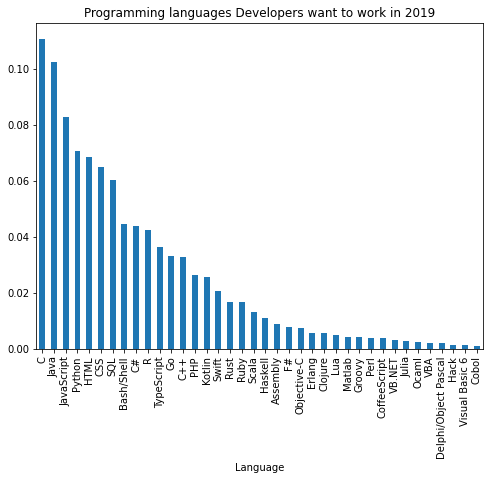

In [9]:
(languages_df_desire/languages_df_desire.sum()).plot(kind='bar',
                                                     legend=None,
                                                     title='Programming languages Developers want to work in 2019',
                                                     figsize=(8,6))

So, expectedly we were supposed to see an increase in C, Java, Javascript and Python in 2019. Let's look at the actual data from both years to see developers do change to languages they desire

In [10]:
compare_df = pd.merge(languages_df18, languages_df19, on='Language')
compare_df.columns = ['2018', '2019']
compare_df.head()

,2018,2019
Language,,
C,67063,71988
Java,64912,70113
JavaScript,54686,59219
SQL,44670,47544
Python,30359,36443


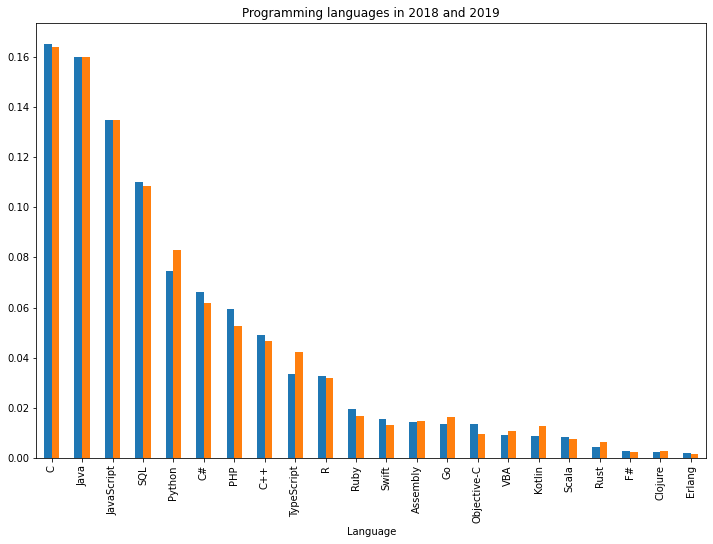

In [11]:
(compare_df/compare_df.sum()).plot(kind='bar',
                                   legend=None,
                                   title='Programming languages in 2018 and 2019',
                                   figsize=(12,8))

It looks like C, Java and Javascript users haven't risen and remained almost the same. However, Python developers have increased as was expected. Although, the data does give an idea of what developers would want to try, there are most certainly other factors to keep into account like the market, the developers' organizations and so on